In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataframe_train = pd.read_csv('titanic.csv')
dataframe_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataframe_train.shape

(891, 12)

In [5]:
dataframe_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
dataframe_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
dataframe_train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
dataframe_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
dataframe_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
dataframe_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# All these columns seems to be irrelevant. 
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked']

In [12]:
dataframe_train = dataframe_train.drop(columns_to_drop, axis = 1)
dataframe_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [13]:
dataframe_train['Age'].fillna(dataframe_train['Age'].median(), inplace=True)

In [14]:
dataframe_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [15]:
# applying one hot encoding on sex col
dataframe_train_one_hot = pd.get_dummies(dataframe_train, columns = ['Sex'])

In [16]:
dataframe_train_one_hot

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,True,False
2,1,3,26.0,0,0,7.9250,True,False
3,1,1,35.0,1,0,53.1000,True,False
4,0,3,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True
887,1,1,19.0,0,0,30.0000,True,False
888,0,3,28.0,1,2,23.4500,True,False
889,1,1,26.0,0,0,30.0000,False,True


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
age_mm_scaler = StandardScaler()
fare_std_scaler = StandardScaler()

dataframe_train_one_hot['Age'] = age_mm_scaler.fit_transform(dataframe_train_one_hot[['Age']])
dataframe_train_one_hot['Fare'] = fare_std_scaler.fit_transform(dataframe_train_one_hot[['Fare']])


In [18]:
dataframe_train_one_hot.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,-0.565736,1,0,-0.502445,False,True
1,1,1,0.663861,1,0,0.786845,True,False
2,1,3,-0.258337,0,0,-0.488854,True,False
3,1,1,0.433312,1,0,0.420730,True,False
4,0,3,0.433312,0,0,-0.486337,False,True


In [19]:
dataframe_train_one_hot.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male'],
      dtype='object')

Text(0.5, 1.0, 'Correlation map')

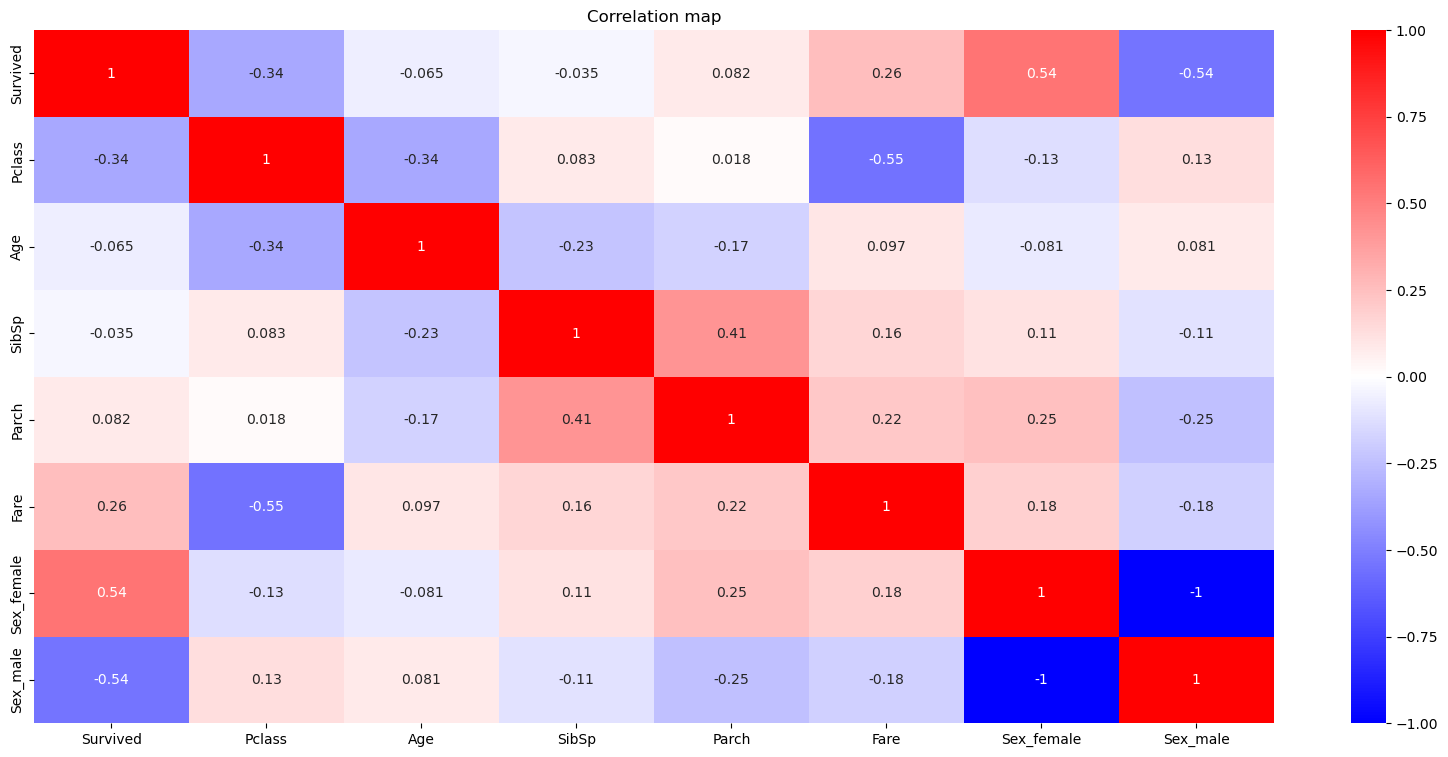

In [20]:
#to find the pairwise correlation
plt.figure(figsize=(20,9));
sns.heatmap(dataframe_train_one_hot.corr(),annot=True,cmap='bwr');  
plt.title("Correlation map")

In [21]:
X = dataframe_train_one_hot[['Pclass', 'Age','SibSp','Parch', 'Fare', 'Sex_female', 'Sex_male']]
y = dataframe_train_one_hot['Survived']

In [22]:
X.shape,y.shape

((891, 7), (891,))

In [23]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,-0.565736,1,0,-0.502445,False,True
1,1,0.663861,1,0,0.786845,True,False
2,3,-0.258337,0,0,-0.488854,True,False
3,1,0.433312,1,0,0.420730,True,False
4,3,0.433312,0,0,-0.486337,False,True


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((668, 7), (223, 7), (668,), (223,))

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [27]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [29]:
y_test

257    1
4      0
488    0
651    1
512    1
      ..
225    0
280    0
121    0
55     1
187    1
Name: Survived, Length: 223, dtype: int64

In [30]:
from sklearn import metrics

In [31]:
metrics.accuracy_score(y_test, y_pred)

0.8654708520179372

In [32]:
metrics.confusion_matrix(y_test, y_pred)

array([[134,   8],
       [ 22,  59]], dtype=int64)

In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       142
           1       0.88      0.73      0.80        81

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



## Decision Tree Algorithm

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
def mymodel(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(metrics.classification_report(y_test,y_pred))
    return model

In [36]:
dt=DecisionTreeClassifier()

In [37]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       142
           1       0.88      0.73      0.80        81

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



DecisionTreeClassifier()

In [38]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       142
           1       0.88      0.73      0.80        81

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



DecisionTreeClassifier(max_depth=10)

In [39]:
from sklearn.metrics import accuracy_score
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(X_train,y_train)
    ypred=dt2.predict(X_test)
    print(f"{i}: {accuracy_score(y_test,y_pred)}")

1: 0.8654708520179372
2: 0.8654708520179372
3: 0.8654708520179372
4: 0.8654708520179372
5: 0.8654708520179372
6: 0.8654708520179372
7: 0.8654708520179372
8: 0.8654708520179372
9: 0.8654708520179372
10: 0.8654708520179372
11: 0.8654708520179372
12: 0.8654708520179372
13: 0.8654708520179372
14: 0.8654708520179372
15: 0.8654708520179372
16: 0.8654708520179372
17: 0.8654708520179372
18: 0.8654708520179372
19: 0.8654708520179372
20: 0.8654708520179372
21: 0.8654708520179372
22: 0.8654708520179372
23: 0.8654708520179372
24: 0.8654708520179372
25: 0.8654708520179372
26: 0.8654708520179372
27: 0.8654708520179372
28: 0.8654708520179372
29: 0.8654708520179372
30: 0.8654708520179372
31: 0.8654708520179372
32: 0.8654708520179372
33: 0.8654708520179372
34: 0.8654708520179372
35: 0.8654708520179372
36: 0.8654708520179372
37: 0.8654708520179372
38: 0.8654708520179372
39: 0.8654708520179372
40: 0.8654708520179372
41: 0.8654708520179372
42: 0.8654708520179372
43: 0.8654708520179372
44: 0.86547085201793

In [40]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)  #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       142
           1       0.88      0.73      0.80        81

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



DecisionTreeClassifier(min_samples_leaf=10)

In [41]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=100,max_depth=3)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       142
           1       0.88      0.73      0.80        81

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=100)

In [42]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7],
          'min_samples_leaf' : [10, 20, 50,100,150],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [43]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [44]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}

In [45]:
my_best_preds = grid_search.predict(X_test)

In [46]:
accuracy_score(y_test, my_best_preds)

0.8475336322869955